Dataset:
    Outlook Temperature Humidity    Wind Play Tennis
0     Sunny         Hot     High    Weak          No
1     Sunny         Hot     High  Strong          No
2  Overcast         Hot     High    Weak         Yes
3      Rain        Mild     High    Weak         Yes
4      Rain        Cool   Normal    Weak         Yes
Accuracy of the model: 60.00%


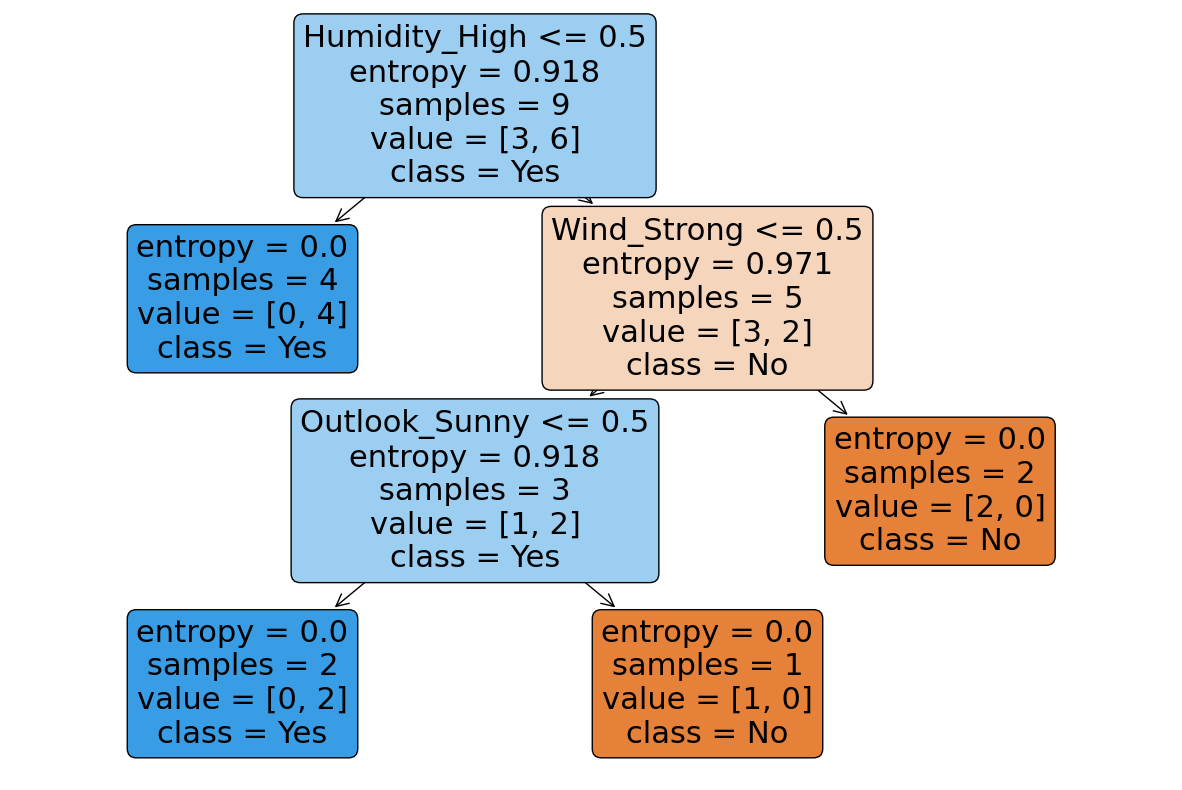

Predicted class for the new sample: No


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

file_path = './Datasets/Lab3.csv'
df = pd.read_csv(file_path)

print("Dataset:")
print(df.head())

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=clf.classes_.tolist(), rounded=True)
plt.show()


new_sample = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Hot'],
    'Humidity': ['High'],
    'Wind': ['Weak']
})

new_sample_encoded = pd.get_dummies(new_sample)
new_sample_encoded = new_sample_encoded.reindex(columns=X.columns, fill_value=0)

predicted_class = clf.predict(new_sample_encoded)
print(f"Predicted class for the new sample: {predicted_class[0]}")
